<a href="https://colab.research.google.com/github/Creciente/Prediccion_ventas_alimenticias/blob/main/Modelos_regresion_pred_ventas__alimentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Proyecto Predicción Ventas Alimentos*

Diccionario de Datos

| Nombre de la variable     | Descripción                                                                                                        |   |   |   |
|---------------------------|--------------------------------------------------------------------------------------------------------------------|---|---|---|
| Item_Identifier           | Identificación única del producto                                                                                  |   |   |   |
| Item_Weight               | Peso del producto                                                                                                  |   |   |   |
| Item_Fat_Content          | Si el producto es bajo en grasa o regular                                                                          |   |   |   |
| Item_Visibility           | Porcentaje de la superficie total de exposición de todos los productos de una tienda asignada al producto concreto |   |   |   |
| Item_Type                 | Categoría a la que el producto pertenece                                                                           |   |   |   |
| Item_MRP                  | Precio máximo de venta al público (precio de catálogo) del producto                                                |   |   |   |
| Outlet_Identifier         | Identificación única de la tienda                                                                                  |   |   |   |
| Outlet_Establishment_Year | El año en que se estableció la tienda                                                                              |   |   |   |
| Outlet_Size               | El tamaño de la tienda en cuanto al área total                                                                     |   |   |   |
| Outlet_Location_Type      | El tipo de área donde se encuentra la tienda                                                                       |   |   |   |
| Outlet_Type               | Si el punto de venta es una tienda de comestibles o algún tipo de supermercado                                     |   |   |   |
| Item_Outlet_Sales         | Ventas del producto en una tienda particular. Es la variable objetivo a predecir.                                  |   |   |   |

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ruta=('/content/drive/MyDrive/Codificación de Dojo/Python para Data Science/Tareas/Archivos para ejercicios/sales_predictions_2023.csv')

In [3]:
df= pd.read_csv(ruta)

In [4]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [5]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [6]:
df.shape


(8523, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing
# 17% de Null en la columna Item_Weight y 28% en la columna Outlet_Size

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

### ***Detección de 3 Incongruencias : 1463 NA en la Columna Item_Weight, Tipo Object en la Columna Outlet_establishment_year y 2410 NA columna outlet_size***

In [11]:
# Tratamiento columna Item_Weight
df['Item_Weight'].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

In [12]:
pesonull_df= df[df['Item_Weight'].isnull()]
pesonull_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [13]:
# Obtener los pesos de las condiciones OUT027, Tier 3, Supermarket Type 3, Medium, Low Fat
# Obtener los pesos de las condiciones Out019 y Tier1, Grocery Store, Small, Regular

In [14]:
df_out027= df.loc[(df['Outlet_Identifier']=='OUT027')&(df['Outlet_Location_Type']=='Tier 3')&(df['Outlet_Type']=='Supermarket Type3')&(df['Item_Fat_Content']=='Low Fat')]
df_out027

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
39,FDB34,NaN,Low Fat,0.026481,Snack Foods,87.6198,OUT027,1985,Medium,Tier 3,Supermarket Type3,2180.4950
62,FDF09,NaN,Low Fat,0.012090,Fruits and Vegetables,38.2848,OUT027,1985,Medium,Tier 3,Supermarket Type3,484.7024
64,FDY45,NaN,Low Fat,0.026016,Snack Foods,255.8356,OUT027,1985,Medium,Tier 3,Supermarket Type3,2543.3560
...,...,...,...,...,...,...,...,...,...,...,...,...
8472,NCS41,NaN,Low Fat,0.053185,Health and Hygiene,182.9608,OUT027,1985,Medium,Tier 3,Supermarket Type3,1653.8472
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120


In [15]:
df_out027['Item_Weight'].value_counts()


Series([], Name: Item_Weight, dtype: int64)

In [16]:
# Verificando identificador de productos
df['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [17]:
# Cada producto específico se le asigna un peso específico
prod_df=df.loc[(df['Item_Identifier']=='FDP10')]
prod_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
585,FDP10,19.0,Low Fat,0.128066,Snack Foods,104.3622,OUT035,2004,Small,Tier 2,Supermarket Type1,1905.5196
2623,FDP10,19.0,Low Fat,0.128815,Snack Foods,107.6622,OUT017,2007,NaN,Tier 2,Supermarket Type1,1164.4842
3382,FDP10,19.0,Low Fat,0.128289,Snack Foods,104.9622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1164.4842
4585,FDP10,19.0,Low Fat,0.128090,Snack Foods,107.0622,OUT046,1997,Small,Tier 1,Supermarket Type1,1376.2086
6087,FDP10,19.0,Low Fat,0.128350,Snack Foods,106.5622,OUT045,2002,NaN,Tier 2,Supermarket Type1,1482.0708
7883,FDP10,19.0,Low Fat,0.127984,Snack Foods,107.6622,OUT013,1987,High,Tier 3,Supermarket Type1,1270.3464


In [18]:
# Reemplazaré por el promedio de los pesos según el tipo de producto
df['Item_Weight'].fillna(df.groupby(['Item_Identifier'])['Item_Weight'].transform('mean'), inplace=True)

In [19]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                     4
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [20]:
#Pesos de producto únicos.
pesonull_df= df[df['Item_Weight'].isnull()]
pesonull_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [21]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

Item_Identifier               0.000000
Item_Weight                   0.046932
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [22]:
# Eliminaré las 4 filas, porque es muy mínimo de porcentaje.
df.dropna(subset=['Item_Weight'],inplace=True)
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [23]:
# Tratamiento columna 'Outlet_Size'
df['Outlet_Size'].value_counts()

Medium    2790
Small     2387
High       932
Name: Outlet_Size, dtype: int64

In [24]:
size_df=df[df['Outlet_Size'].isnull()]
size_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [25]:
df.groupby('Outlet_Size')['Outlet_Type'].value_counts()

Outlet_Size  Outlet_Type      
High         Supermarket Type1     932
Medium       Supermarket Type3     932
             Supermarket Type1     930
             Supermarket Type2     928
Small        Supermarket Type1    1860
             Grocery Store         527
Name: Outlet_Type, dtype: int64

In [26]:
df.groupby('Outlet_Location_Type')['Outlet_Type'].value_counts()

Outlet_Location_Type  Outlet_Type      
Tier 1                Supermarket Type1    1860
                      Grocery Store         527
Tier 2                Supermarket Type1    2785
Tier 3                Supermarket Type1     932
                      Supermarket Type3     932
                      Supermarket Type2     928
                      Grocery Store         555
Name: Outlet_Type, dtype: int64

In [27]:
df.groupby('Outlet_Location_Type')['Outlet_Size'].value_counts()

Outlet_Location_Type  Outlet_Size
Tier 1                Small          1457
                      Medium          930
Tier 2                Small           930
Tier 3                Medium         1860
                      High            932
Name: Outlet_Size, dtype: int64

In [28]:
# Se establecerá los valores de Outlet Size NA como 'Small', puesto que los Grocery Store, estan clasificados como Small, y los
#Supermercados Tipo 1, Tier 2 están clasificados como small.

df['Outlet_Size'].fillna('Small',inplace = True)

In [29]:
df['Outlet_Size'].value_counts()

Small     4797
Medium    2790
High       932
Name: Outlet_Size, dtype: int64

In [30]:
# Todos los Supermarket type 1 eran Tier 2
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8519 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8519 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8519 non-null   object 
 3   Item_Visibility            8519 non-null   float64
 4   Item_Type                  8519 non-null   object 
 5   Item_MRP                   8519 non-null   float64
 6   Outlet_Identifier          8519 non-null   object 
 7   Outlet_Establishment_Year  8519 non-null   int64  
 8   Outlet_Size                8519 non-null   object 
 9   Outlet_Location_Type       8519 non-null   object 
 10  Outlet_Type                8519 non-null   object 
 11  Item_Outlet_Sales          8519 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.2+ KB


In [32]:
# Cambio de tipo a Int de la columna 'Outlet_EStablishment_Year
df['Outlet_Establishment_Year']= df['Outlet_Establishment_Year'].astype(int)

In [33]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [34]:
# Verificación de incongruencia en la columna Año de Establecimiento.
df['Outlet_Establishment_Year'].value_counts()

1985    1459
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8519 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8519 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8519 non-null   object 
 3   Item_Visibility            8519 non-null   float64
 4   Item_Type                  8519 non-null   object 
 5   Item_MRP                   8519 non-null   float64
 6   Outlet_Identifier          8519 non-null   object 
 7   Outlet_Establishment_Year  8519 non-null   int64  
 8   Outlet_Size                8519 non-null   object 
 9   Outlet_Location_Type       8519 non-null   object 
 10  Outlet_Type                8519 non-null   object 
 11  Item_Outlet_Sales          8519 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.2+ KB


# **Visualizaciones**

In [36]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [37]:
# Estadísticas

df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8519.000000,8519.000000,8519.000000,8519.000000,8519.000000
mean,12.875420,0.066112,141.010019,1997.837892,2181.188779
std,4.646098,0.051586,62.283594,8.369105,1706.511093
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.785000,0.026983,93.844900,1987.000000,834.247400
50%,12.650000,0.053925,143.047000,1999.000000,1794.331000
75%,16.850000,0.094558,185.676600,2004.000000,3100.630600
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [38]:
df2= df.groupby('Outlet_Type')['Item_Outlet_Sales'].sum()
df2

Outlet_Type
Grocery Store        3.679138e+05
Supermarket Type1    1.291734e+07
Supermarket Type2    1.851823e+06
Supermarket Type3    3.444468e+06
Name: Item_Outlet_Sales, dtype: float64

In [39]:
import seaborn as sns

In [40]:
from seaborn.widgets import color_palette
color_palette

<function seaborn.palettes.color_palette(palette=None, n_colors=None, desat=None, as_cmap=False)>

# *Gráfica Porcentaje de Venta por tipo de Local*

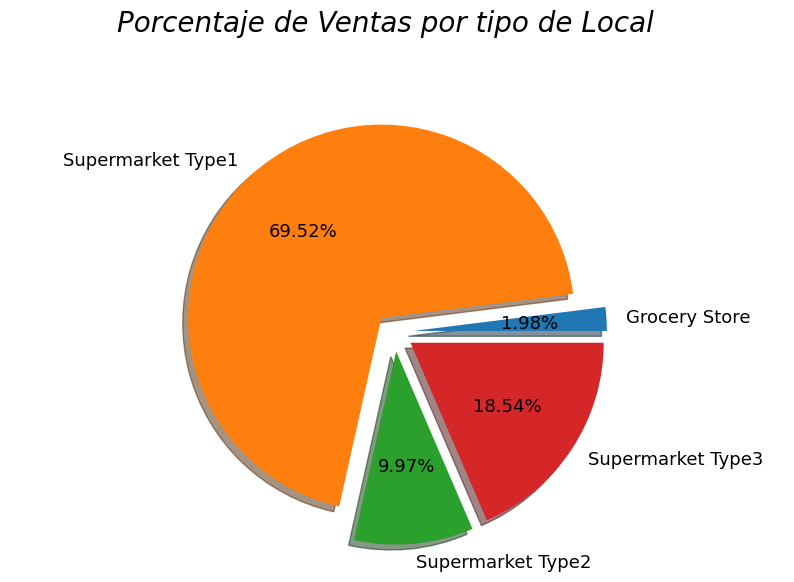

In [41]:
data = df2
fig = plt.figure(dpi=100,figsize=(10,6))
ax1 = fig.add_subplot(1,1,1)

etiquetas =['Grocery Store','Supermarket Type1','Supermarket Type2','Supermarket Type3']
explotar = [0.1, 0.1, 0.1, 0.1]
colors = sns.color_palette('tab10')

plt.pie(data, colors = colors,
        labels=etiquetas,
        shadow= True,
        autopct='%.2f%%',
        explode= explotar,
        textprops = {'color': 'Black','fontsize':13})
plt.title('Porcentaje de Ventas por tipo de Local',
             transform=fig.transFigure,
             style='italic',
             color='black',
             fontsize=20)
ax1.axis("equal")
plt.show()

Se aprecia con claridad que el Supermarket Tipo 1 es el tipo de Local que acumula el mayor porcentaje de Ventas, casi 70% de negocio.
Los locales de Comida rápida son los que proporcionan menores ventas acercandose al 2%.

# *Gráfica Ventas por Tipo de Local*

In [42]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1082
Supermarket Type3     932
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [43]:
df_type1= df.loc[(df['Outlet_Type']=='Supermarket Type1')]
df_type1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Small,Tier 2,Supermarket Type1,1076.5986
...,...,...,...,...,...,...,...,...,...,...,...,...
8517,FDF53,20.750,reg,0.083607,Frozen Foods,178.8318,OUT046,1997,Small,Tier 1,Supermarket Type1,3608.6360
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136


In [44]:
df_type2= df.loc[(df['Outlet_Type']=='Supermarket Type2')]
df_type2

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
16,NCB42,11.800,Low Fat,0.008596,Health and Hygiene,115.3492,OUT018,2009,Medium,Tier 3,Supermarket Type2,1621.8888
31,NCS17,18.600,Low Fat,0.080829,Health and Hygiene,96.4436,OUT018,2009,Medium,Tier 3,Supermarket Type2,2741.7644
32,FDP33,18.700,Low Fat,0.000000,Snack Foods,256.6672,OUT018,2009,Medium,Tier 3,Supermarket Type2,3068.0064
...,...,...,...,...,...,...,...,...,...,...,...,...
8506,DRF37,17.250,Low Fat,0.084676,Soft Drinks,263.1910,OUT018,2009,Medium,Tier 3,Supermarket Type2,3944.8650
8511,FDF05,17.500,Low Fat,0.026980,Frozen Foods,262.5910,OUT018,2009,Medium,Tier 3,Supermarket Type2,4207.8560
8515,FDH24,20.700,Low Fat,0.021518,Baking Goods,157.5288,OUT018,2009,Medium,Tier 3,Supermarket Type2,1571.2880
8516,NCJ19,18.600,Low Fat,0.118661,Others,58.7588,OUT018,2009,Medium,Tier 3,Supermarket Type2,858.8820


In [45]:
df_type3=df.loc[(df['Outlet_Type']=='Supermarket Type3')]
df_type3

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,19.000,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,8.260,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,8.315,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
36,FDV20,20.200,Regular,0.059512,Fruits and Vegetables,128.0678,OUT027,1985,Medium,Tier 3,Supermarket Type3,2797.6916
38,FDX10,6.385,Regular,0.123111,Snack Foods,36.9874,OUT027,1985,Medium,Tier 3,Supermarket Type3,388.1614
...,...,...,...,...,...,...,...,...,...,...,...,...
8472,NCS41,12.850,Low Fat,0.053185,Health and Hygiene,182.9608,OUT027,1985,Medium,Tier 3,Supermarket Type3,1653.8472
8485,DRK37,5.000,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,17.250,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,19.100,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120


In [46]:
df_store=df.loc[(df['Outlet_Type']=='Grocery Store')]
df_store

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
23,FDC37,15.500,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,Small,Tier 3,Grocery Store,178.4344
29,FDC14,14.500,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
30,FDV38,19.250,Low Fat,0.170349,Dairy,55.7956,OUT010,1998,Small,Tier 3,Grocery Store,163.7868
...,...,...,...,...,...,...,...,...,...,...,...,...
8473,DRI47,14.700,Low Fat,0.035016,Hard Drinks,144.3128,OUT010,1998,Small,Tier 3,Grocery Store,431.4384
8480,FDQ58,7.315,Low Fat,0.000000,Snack Foods,154.5340,OUT019,1985,Small,Tier 1,Grocery Store,459.4020
8486,FDR20,20.000,Regular,0.000000,Fruits and Vegetables,46.4744,OUT010,1998,Small,Tier 3,Grocery Store,45.2744
8490,FDU44,12.150,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


<ipython-input-47-8569dc9b01c6>:42: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(left=0.125,
<ipython-input-47-8569dc9b01c6>:48: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
<ipython-input-47-8569dc9b01c6>:49: UserWarning: The figure layout has changed to tight
  figure.tight_layout()


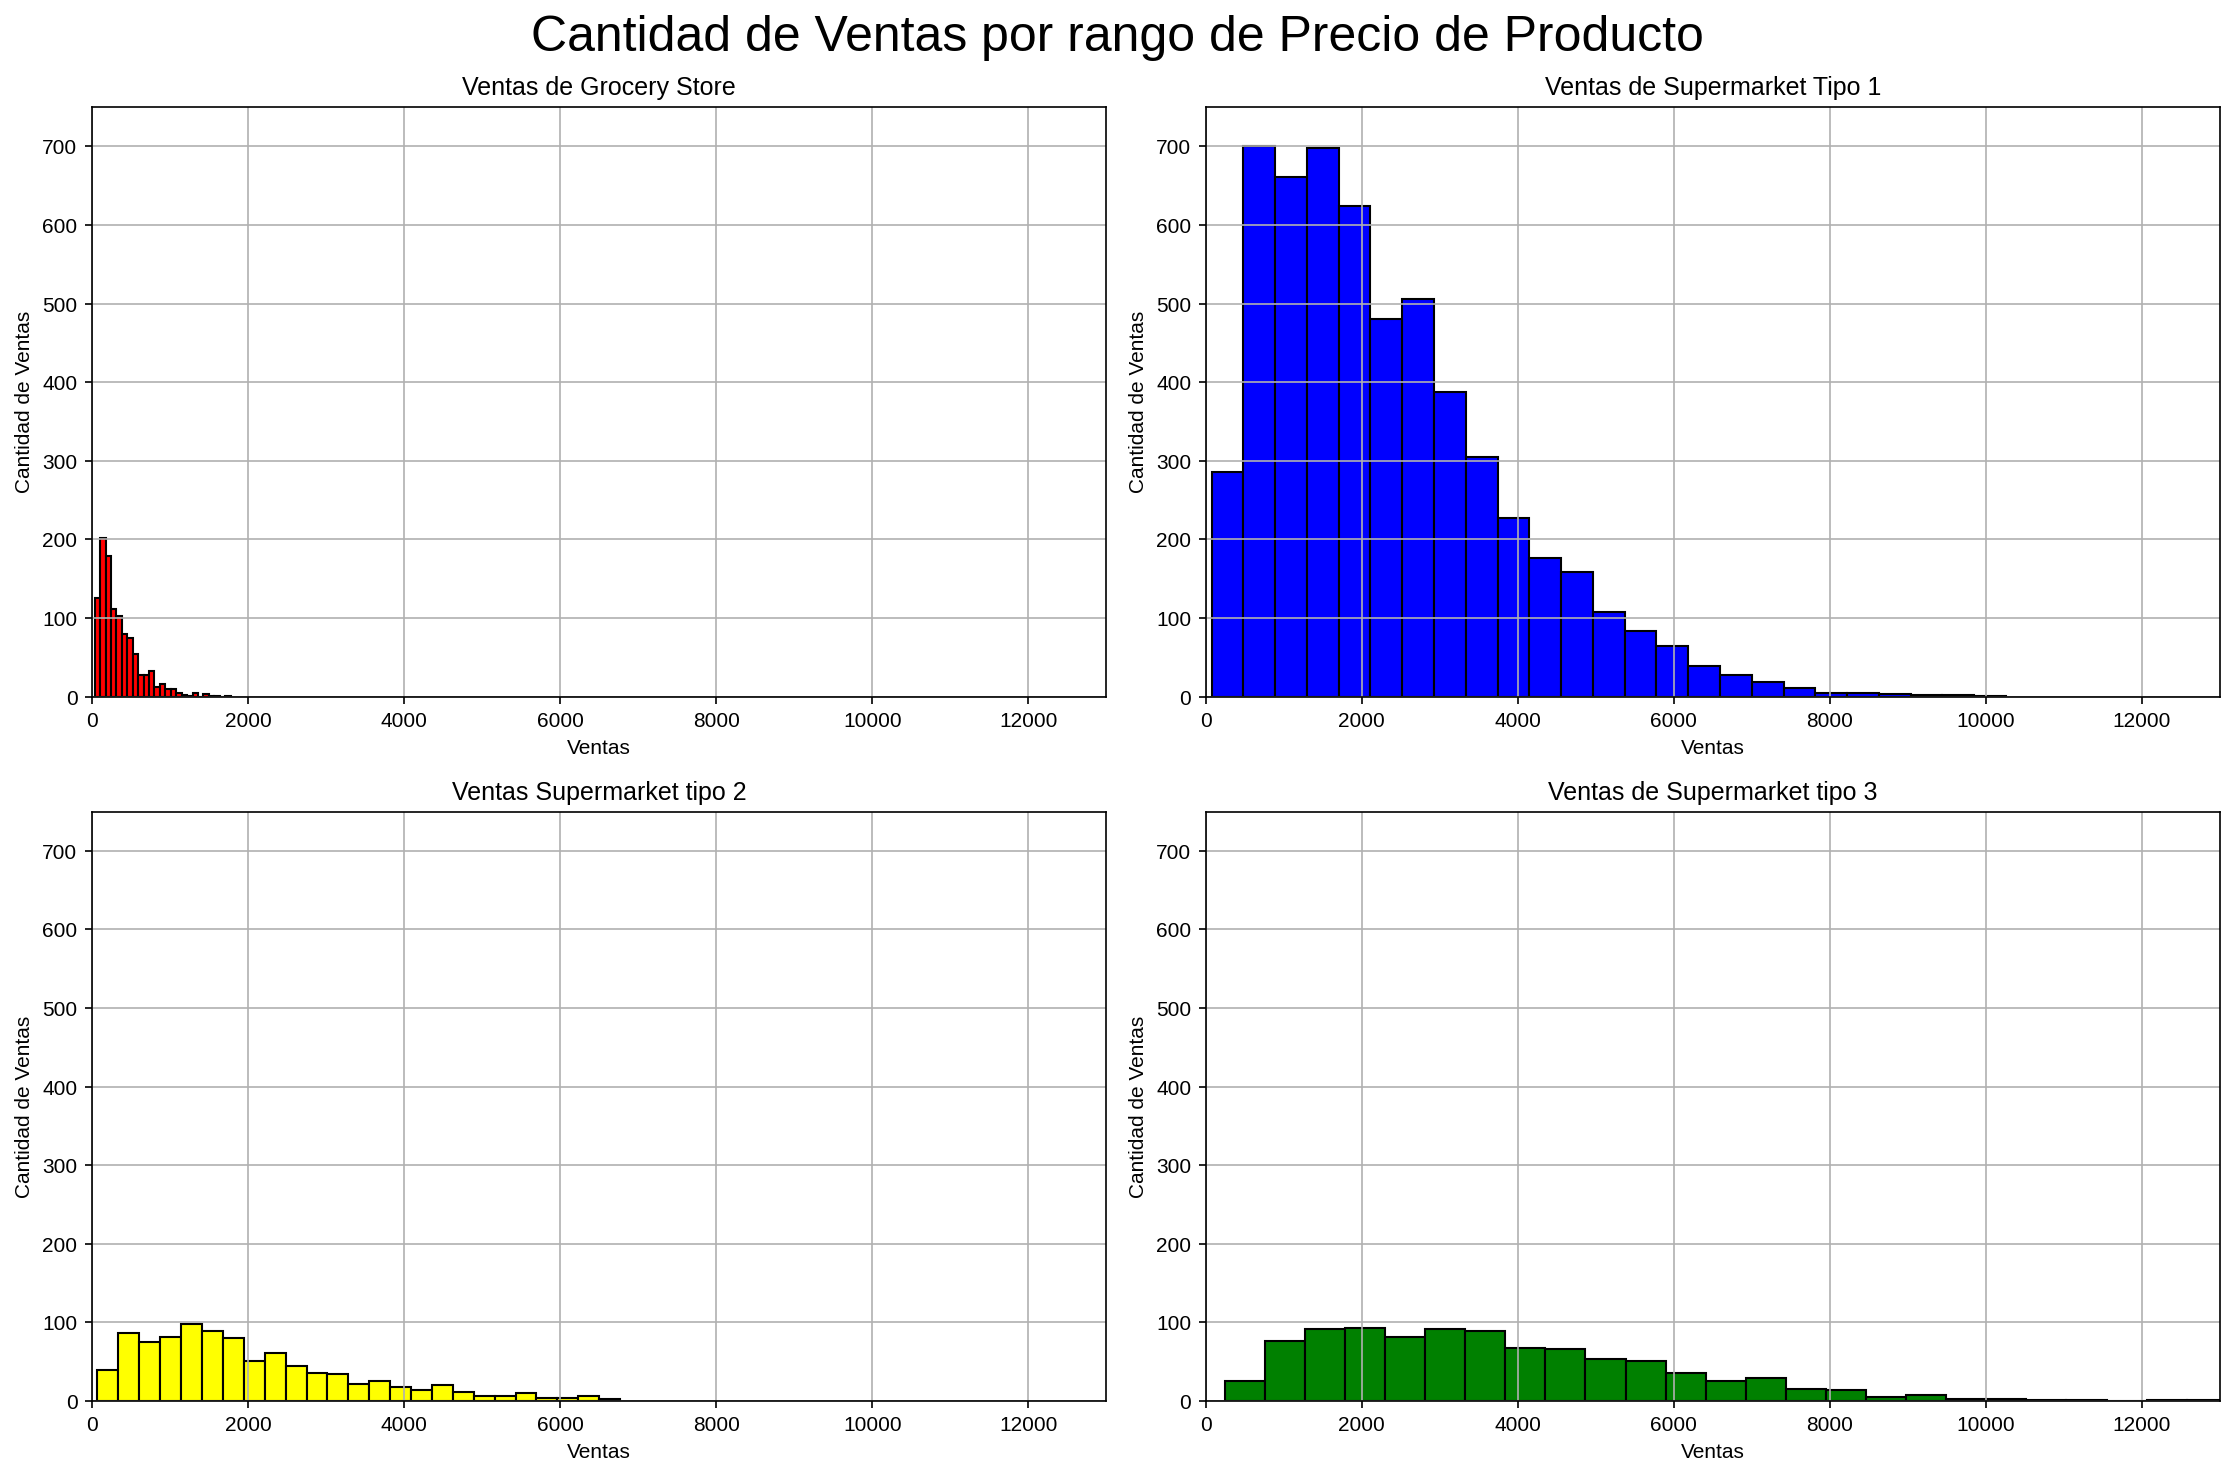

In [47]:
figure= plt.figure(figsize= (15,10),dpi= 150, layout= 'constrained')


axes_1= figure.add_subplot(2,2,1)
axes_1 =df_store['Item_Outlet_Sales'].hist(bins= 25,
                                    edgecolor='black',
                                    color= 'red')
axes_1.set_title('Ventas de Grocery Store', color='black')
plt.xlim(0,13000)
plt.xlabel('Ventas')
plt.ylim(0, 750)
plt.ylabel('Cantidad de Ventas')

axes_2= figure.add_subplot(2,2,2)
axes_2= df_type1['Item_Outlet_Sales'].hist(bins= 25,
                                    edgecolor='black',
                                    color= 'blue')
axes_2.set_title('Ventas de Supermarket Tipo 1', color='black')
plt.xlabel('Ventas')
plt.xlim(0, 13000)
plt.ylabel('Cantidad de Ventas')
plt.ylim(0, 750)
axes_3= figure.add_subplot(2,2,3)
axes_3= df_type2['Item_Outlet_Sales'].hist(bins= 25,
                                    edgecolor='black',
                                    color= 'yellow')
axes_3.set_title('Ventas Supermarket tipo 2',color='black')
plt.xlabel('Ventas')
plt.xlim(0, 13000)
plt.ylabel('Cantidad de Ventas')
plt.ylim(0, 750)
axes_4= figure.add_subplot(2,2,4)
axes_4= df_type3['Item_Outlet_Sales'].hist(bins= 25,
                                    edgecolor='black',
                                    color= 'green')
axes_4.set_title('Ventas de Supermarket tipo 3',color='black')
plt.xlabel('Ventas')
plt.xlim(0, 13000)
plt.ylabel('Cantidad de Ventas')
plt.ylim(0, 750)
plt.suptitle('Cantidad de Ventas por rango de Precio de Producto', fontsize= 24, color='black')
plt.subplots_adjust(left=0.125,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.2,
                    hspace=0.35)
plt.style.use('seaborn')
figure.tight_layout()
plt.show()
figure.savefig('Distribucion_dueños_mascotas.png', bbox_inches='tight')



La gráfica muestra las ventas por rango de precio de los distintos tipos de Locales.
Los Locales tipo Grosery Store tienen sus mayore ventas con los productos de cuestan 125 alacanzando cantidades de 200 productos.
Los supermercados tipo 1 concentran sus mayores ventas hasta un rango de 2000.
Los supermercados tipo 2 igual concentran sus mayores ventas hasta un rango de 2000.
Mientras que los supermercados tipo 3 concentran sus mayores cantidades de ventas entre los 2000 a 4000. Es probable que los supermercados tipo 3 estén orientados a estratos altos de ingresos.


# **Gráfica Ventas por tamaño de Local**

In [48]:
df['Outlet_Size'].value_counts()

Small     4797
Medium    2790
High       932
Name: Outlet_Size, dtype: int64

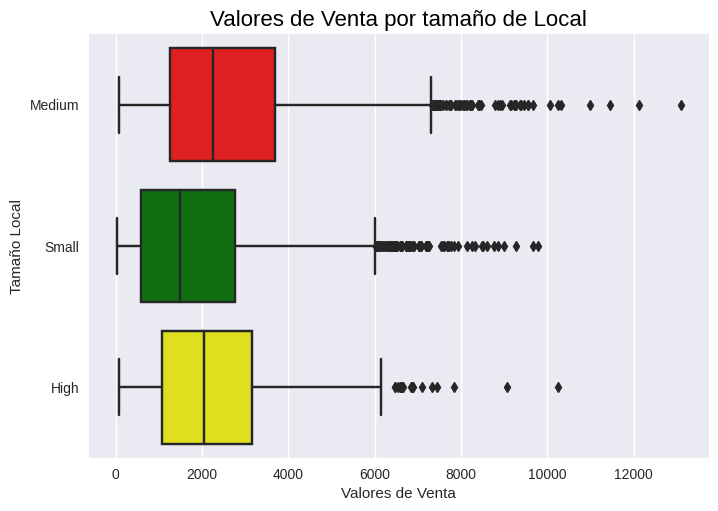

In [49]:
sns.boxplot(x =df['Item_Outlet_Sales'],
            y= df['Outlet_Size'],
           data =df,
            palette=['red','green','yellow'])
plt.title('Valores de Venta por tamaño de Local', color='black', fontsize= 16)
plt.xlabel('Valores de Venta')
plt.ylabel('Tamaño Local')

plt.show()

La gráfica muestra que los locales medianos concetran los mayores valores de
ventas, teniendo inclusive outliers por sobre los 12000. Su mediana esta al rededor de 2200 y los rangos de valores varian entre 0 a 7200 app. Posee muchos outliers por sobre los 6000.
Los locales pequeños poseen una mediana de valores de venta 1600 app y sus valores de venta se encuentran entre 0 y 6000 con muchos valores outliers superiores a 6000.
Los locales grandes poseen una mediana de valores de 2000 y su rango de valores está entre 0 y pasado 6000, tabién posee valores ouliers pero menor que los locales pequeños y los medianos.

# Gráfica Correlación entre variables

In [50]:
corr = df.corr()

corr

<ipython-input-50-1b9f4b865a31>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.009173,0.025975,-0.013426,0.013168
Item_Visibility,-0.009173,1.000000,-0.001155,-0.074325,-0.128297
Item_MRP,0.025975,-0.001155,1.000000,0.004599,0.567803
Outlet_Establishment_Year,-0.013426,-0.074325,0.004599,1.000000,-0.049083
Item_Outlet_Sales,0.013168,-0.128297,0.567803,-0.049083,1.000000


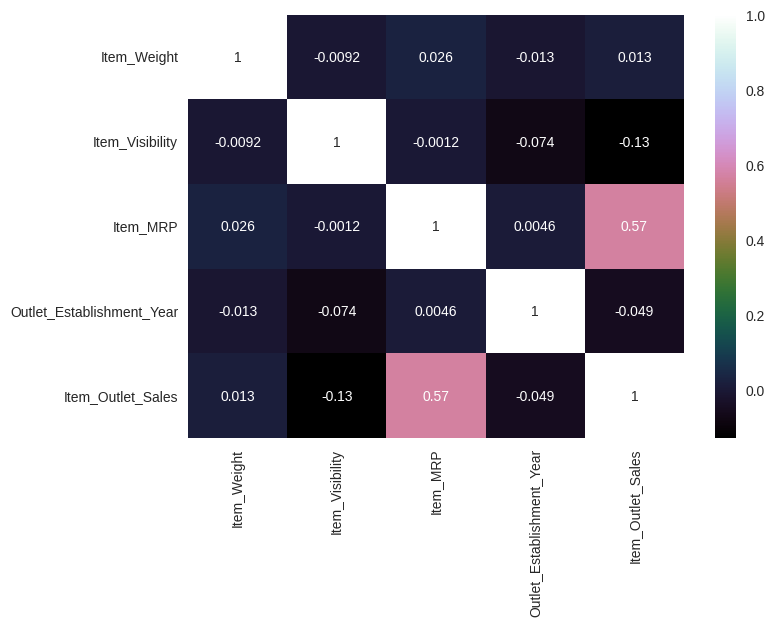

In [51]:
sns.heatmap(corr, annot=True,cmap="cubehelix")
plt.show()

La gráfica muestra muy poca correlación entre las variables. Siendo la variable Venta Precio máximo al público la que presenta correlacion moderada de 0.57.
La gráfica no es contundente en la muestra de información, ni para toma de decisiones.

# Gráfica Visibilidad de los Productos Bajo en Grasas y los Productos Regulares

In [52]:
# Se visualiza inconsistencia en los nombres de los productos
df['Item_Fat_Content'].value_counts()

Low Fat    5088
Regular    2886
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [53]:
# Low Fat = LF = low fat
#Regular = reg

In [54]:
df['Item_Fat_Content']= df['Item_Fat_Content'].replace('LF','Low Fat')
df['Item_Fat_Content']= df['Item_Fat_Content'].replace('low fat','Low Fat')
df['Item_Fat_Content']= df['Item_Fat_Content'].replace('reg','Regular')
df['Item_Fat_Content'].value_counts()

Low Fat    5516
Regular    3003
Name: Item_Fat_Content, dtype: int64

In [55]:
df['Item_Fat_Content']= df['Item_Fat_Content'].replace('Low Fast','Low Fat')
df['Item_Fat_Content'].value_counts()

Low Fat    5516
Regular    3003
Name: Item_Fat_Content, dtype: int64

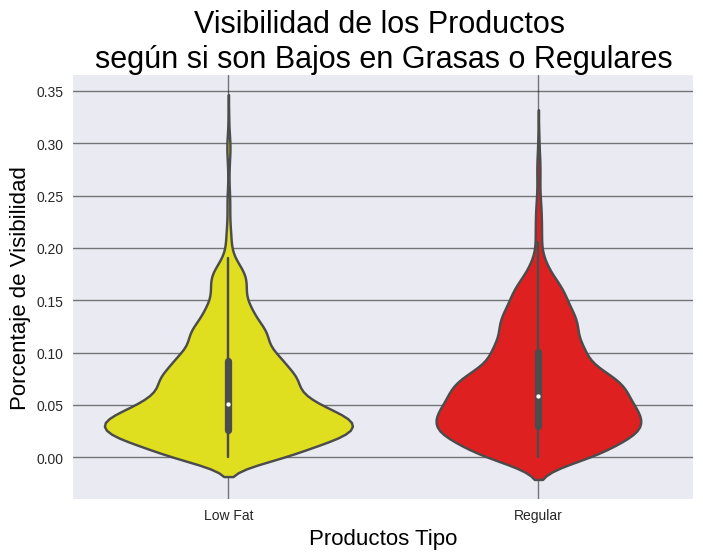

In [56]:
sns.violinplot(x="Item_Fat_Content", y='Item_Visibility',
               data=df,
               palette=('yellow', 'red'))

plt.xlabel('Productos Tipo', color= 'black', fontsize= 16)
plt.ylabel('Porcentaje de Visibilidad',color= 'black',fontsize= 16)
plt.title('Visibilidad de los Productos \nsegún si son Bajos en Grasas o Regulares', color='black', fontsize=22)
plt.grid(color='black', alpha= 0.5)
plt.show()


La gráfica muestra la visibilidad de los alimentos Bajo en grasas y regulares. Se aprecia que los alimentos regulares, poseen una leve mayor visibilidad que los bajo en grasa(6% > 5%). El gráfico no muestra diferencias significativas.

La gráfica muestra la clasificación de los productos y su respectiva venta.
Los alimentos que tienen mayor venta son los Alimnetos con almidón, mientras que los que se venden menos son los para hornear.
Aunque los alimentos para hornear son los de menos venta, igualmente el monto 1800 aproximado, no deja de ser despreciable.
En general, hay una buena selección de los tipo de productos.


df_type2 = df.loc[(df['Outlet_Type']=='Supermarket Type2')]

In [57]:
df_type3 = df.loc[(df['Outlet_Type']=='Supermarket Type3')]

In [58]:
df_grocerystore = df.loc[(df['Outlet_Type']=='Grocery Store')]

# *Gráfica de Tipo de Producto por Tipo de Local: Supermarket Type1*

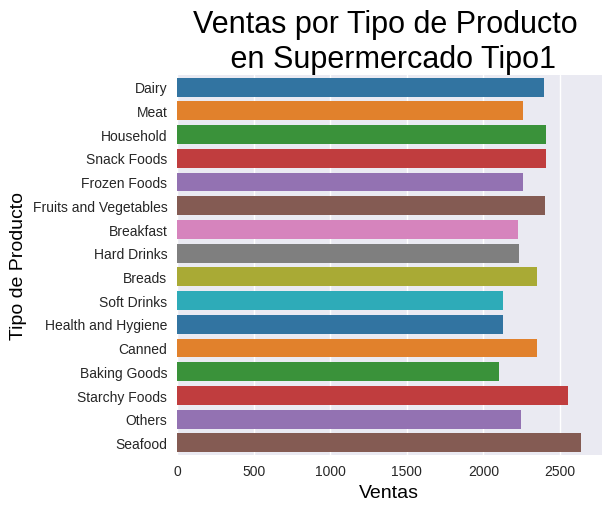

In [59]:
colors = sns.color_palette('tab10')
figure= plt.figure(figsize= (6,5),dpi= 100, layout= 'constrained')

axes_1= figure.add_subplot(1,1,1)

axes_1 =sns.barplot(x="Item_Outlet_Sales", y="Item_Type",
                    data=df_type1,
                    errorbar=None,
                    palette =colors)
axes_1.set_xlabel ('Ventas', fontsize=14, color='black')
axes_1.set_ylabel ('Tipo de Producto', fontsize=14, color='black')
axes_1.set_title('Ventas por Tipo de Producto \n en Supermercado Tipo1', color='black', fontsize= 22)
plt.show()

El supermercado Tipo 1 se destaca por tener mayores ventas en los productos del mar, seguido por los alimentos ricos en almidón.
Mantiene la tendencia de que los prodcutos que menos se venden son los para hornear.

# *Gráfica de Tipo de Producto por Tipo de Local: Supermarket Type2*

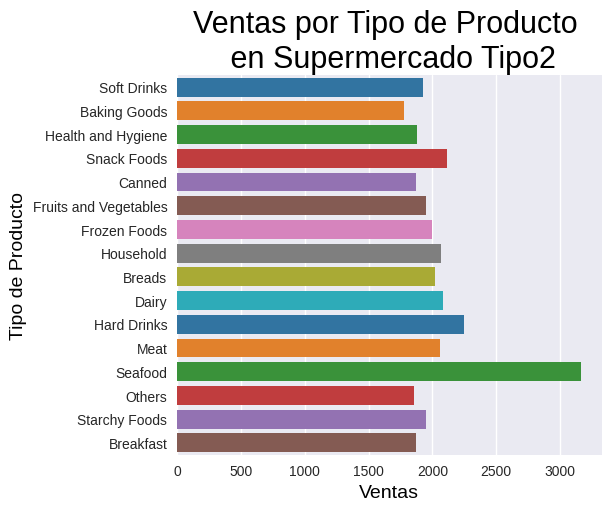

In [60]:
colors = sns.color_palette('tab10')
figure= plt.figure(figsize= (6,5),dpi= 100, layout= 'constrained')

axes_1= figure.add_subplot(1,1,1)

axes_1 =sns.barplot(x="Item_Outlet_Sales", y="Item_Type",
                    data=df_type2,
                    errorbar=None,
                    palette =colors)
axes_1.set_xlabel ('Ventas', fontsize=14, color='black')
axes_1.set_ylabel ('Tipo de Producto', fontsize=14, color='black')
axes_1.set_title ('Ventas por Tipo de Producto \n en Supermercado Tipo2', color='black', fontsize= 22)
plt.show()

Los supermercados tipo 2 se destacan notablemente por las ventas de productos del mar, teniendo ventas por sobre 3000.
Mientras que los demás tipos de productos mantienen ventas por sobre los 1800 hasta 2300 aproximadamente.

# *Gráfica de Tipo de Producto por Tipo de Local: Supermarket Type3*

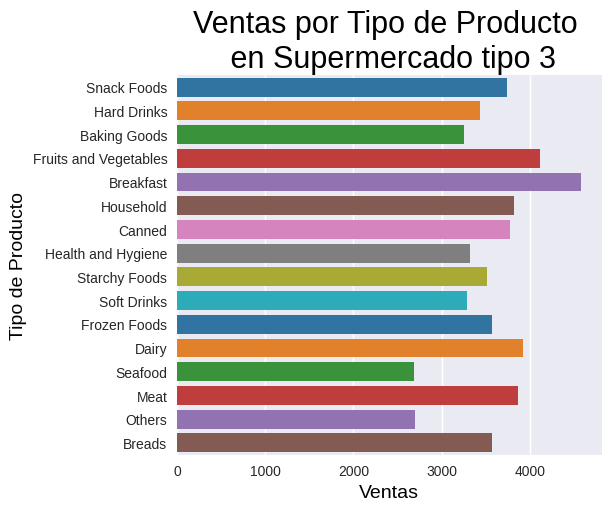

In [61]:
colors = sns.color_palette('tab10')
figure= plt.figure(figsize= (6,5),dpi= 100, layout= 'constrained')

axes_1= figure.add_subplot(1,1,1)

axes_1 =sns.barplot(x="Item_Outlet_Sales", y="Item_Type",
                    data=df_type3,
                    errorbar=None,
                    palette =colors)
axes_1.set_xlabel ('Ventas', fontsize=14, color='black')
axes_1.set_ylabel ('Tipo de Producto', fontsize=14, color='black')
axes_1.set_title('Ventas por Tipo de Producto \n en Supermercado tipo 3', color='black', fontsize= 22)
plt.show()

Los supermercados tipo 3, tiene mayores ventas en prodcutos desayunos, seguido por frutas y vegetales y lácteos, por que que este tipo de supermercado, es posible que se encuentre cercano a sectores de oficinas. Aquí los productos del mar son menos vendidos.
todos los tipos de productos vendidos en éste tipo de local obtiene ventas por sobre 2500.

# *Gráfica de Tipo de Producto por Tipo de Local: Grocery Store*

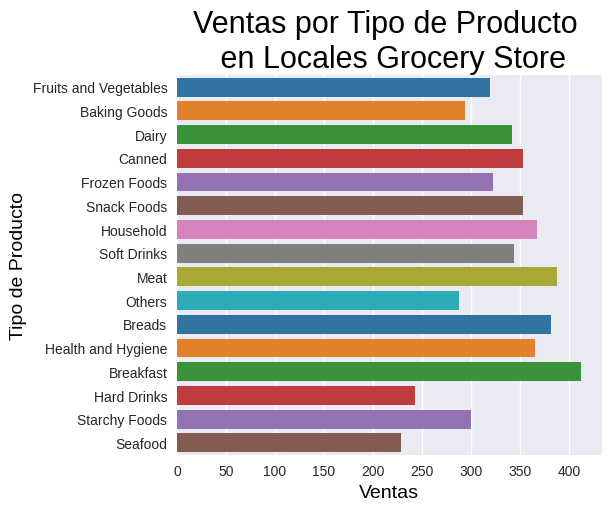

In [62]:
colors = sns.color_palette('tab10')
figure= plt.figure(figsize= (6,5),dpi= 100, layout= 'constrained')

axes_1= figure.add_subplot(1,1,1)

axes_1 =sns.barplot(x="Item_Outlet_Sales", y="Item_Type",
                    data=df_grocerystore,
                    errorbar=None,
                    palette =colors)
axes_1.set_xlabel ('Ventas', fontsize=14, color='black')
axes_1.set_ylabel ('Tipo de Producto', fontsize=14, color='black')
axes_1.set_title('Ventas por Tipo de Producto \n en Locales Grocery Store', color='black', fontsize= 22)
plt.show()

Los Grocery Store, tiene su mayor cantidad de ventas en los alimentos para hacer alimentos de comida rápida.
Se destaca sus mayores ventas en los desayunos, carne, pan, familiares.
Su producto estrella son los desayunos, mientras que los alimentos del mar son los menos vendidos.

# ***Preprocesamiento de DataFra***me


In [63]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8519 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8519 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8519 non-null   object 
 3   Item_Visibility            8519 non-null   float64
 4   Item_Type                  8519 non-null   object 
 5   Item_MRP                   8519 non-null   float64
 6   Outlet_Identifier          8519 non-null   object 
 7   Outlet_Establishment_Year  8519 non-null   int64  
 8   Outlet_Size                8519 non-null   object 
 9   Outlet_Location_Type       8519 non-null   object 
 10  Outlet_Type                8519 non-null   object 
 11  Item_Outlet_Sales          8519 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.2+ KB


In [65]:
from sklearn.model_selection import train_test_split

from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,StandardScaler

from sklearn import set_config
set_config(display="diagram")

Visualización de la matriz de correlación muestra que las variables se correlacionan debilmente con el target 'Item_Outlet_Sales'. Por tanto, se ocuparán todas las variables para formar la matriz de características.

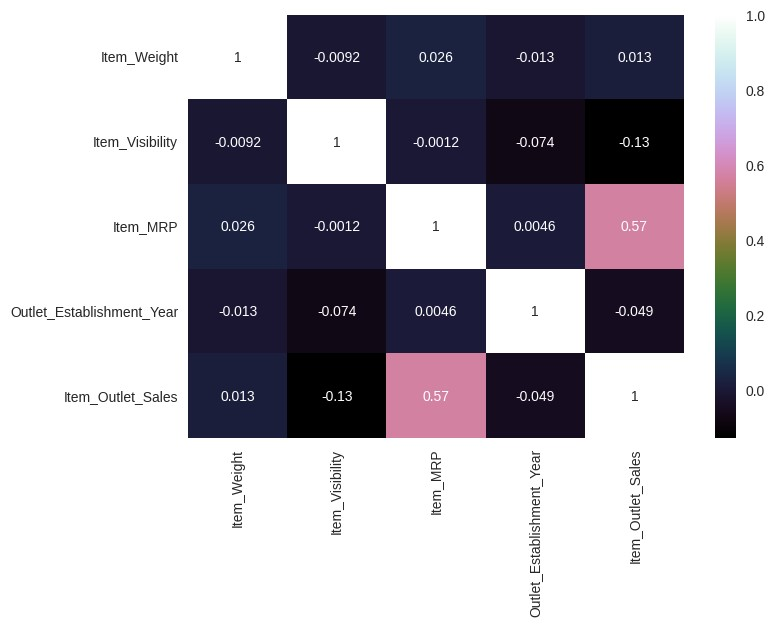

In [66]:
## Determinar matriz X y columna target y

y = df['Item_Outlet_Sales']
X = df.drop(columns=['Item_Outlet_Sales'])

In [67]:
## Visualización de X e y
y[0:5]

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [68]:
X.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1


In [69]:
## Colocar como índice la columna 'Item_Identifier'

X = X.set_index('Item_Identifier')

In [70]:
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
Item_Identifier,,,,,,,,,,
FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store
NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1


## ***Clasificación de Tipos de Columnas***


### Se clasificarán las columnas en:
- Númericas : Item_Weight, Item_Visibility,Item_MRP,Outlet_Establishment_Year

- Ordinales: Outlet_Size

- Categóricas: Item_Fat_Content, Item_Type, Outlet_Identifier,Outlet_Location_Type,Outlet_Type

In [71]:
## Transformación de columnas Ordinales
## Transformación columna Outlet_Size. Verificación datos columna


In [72]:
## Definir; Small = 0, Medium = 1 y High = 2

encoder = OrdinalEncoder(categories=[['Small','Medium','High']])
encoder.fit(X[["Outlet_Size"]])
X["Outlet_Size"] = encoder.transform(X[['Outlet_Size']])


In [73]:
X["Outlet_Size"].value_counts()

0.0    4797
1.0    2790
2.0     932
Name: Outlet_Size, dtype: int64

In [74]:
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
Item_Identifier,,,,,,,,,,
FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,1.0,Tier 1,Supermarket Type1
DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,1.0,Tier 3,Supermarket Type2
FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,1.0,Tier 1,Supermarket Type1
FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,0.0,Tier 3,Grocery Store
NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,2.0,Tier 3,Supermarket Type1


In [75]:
X.dtypes

Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                  float64
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [76]:
## Cambiar tipos de datos para seleccionar

X['Outlet_Establishment_Year']= X['Outlet_Establishment_Year'].astype(float)
X['Outlet_Size']= X['Outlet_Size'].astype(int)

In [77]:
X.dtypes

Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year    float64
Outlet_Size                    int64
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [78]:
## Clasificar las columnas categóricas y númericas

# Instanciar selectores de columnas categóricas

cat_selector = make_column_selector(dtype_include="object")


In [79]:
cat_selector(X)

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Location_Type',
 'Outlet_Type']

In [80]:
## Seleccionar las columnas numéricas, menos la columna Outlet_Size, porque es Ordinal
num_selector =make_column_selector(dtype_include="number",dtype_exclude='int64')

In [81]:
num_selector(X)

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']

In [82]:
#Instanciar transformador - OneHotEncoder
onehot = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [83]:
#Instanciar transformador - StandardScaler
standard_scaler = StandardScaler()

In [84]:
#Imputador numérico
imputer_num = SimpleImputer(strategy="mean")

In [85]:
#Imputador categórico
imputer_cat = SimpleImputer(strategy="most_frequent")

In [86]:
num_pipeline=make_pipeline(imputer_num,standard_scaler)
num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [87]:
cat_pipeline = make_pipeline(imputer_cat,onehot)
cat_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [88]:
#Instanciar columntransformer
col_transformer = make_column_transformer((num_pipeline, num_selector),(cat_pipeline, cat_selector),remainder = 'passthrough')

In [89]:
col_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7853e3a371c0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7853e3a36260>)])

In [90]:
#Entrenamiento
col_transformer.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7853e3a371c0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7853e3a36260>)])

In [91]:
## Transformador
X_procesado = col_transformer.transform(X)
X_procesado

array([[-0.76959845, -0.9705818 ,  1.74693783, ...,  0.        ,
         0.        ,  1.        ],
       [-1.49713327, -0.90794596, -1.48909619, ...,  1.        ,
         0.        ,  1.        ],
       [ 0.99542688, -0.95676368,  0.00976206, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.48977736, -0.59954587, -0.89736151, ...,  0.        ,
         0.        ,  0.        ],
       [-1.21946466,  1.5336257 , -0.60817047, ...,  1.        ,
         0.        ,  1.        ],
       [ 0.41426   , -0.41165261, -1.05239377, ...,  0.        ,
         0.        ,  0.        ]])

In [92]:
X_procesado = pd.DataFrame(X_procesado,columns=col_transformer.get_feature_names_out())
X_procesado

,pipeline-1__Item_Weight,pipeline-1__Item_Visibility,pipeline-1__Item_MRP,pipeline-1__Outlet_Establishment_Year,pipeline-2__Item_Fat_Content_Low Fat,pipeline-2__Item_Fat_Content_Regular,pipeline-2__Item_Type_Baking Goods,pipeline-2__Item_Type_Breads,pipeline-2__Item_Type_Breakfast,pipeline-2__Item_Type_Canned,...,pipeline-2__Outlet_Identifier_OUT046,pipeline-2__Outlet_Identifier_OUT049,pipeline-2__Outlet_Location_Type_Tier 1,pipeline-2__Outlet_Location_Type_Tier 2,pipeline-2__Outlet_Location_Type_Tier 3,pipeline-2__Outlet_Type_Grocery Store,pipeline-2__Outlet_Type_Supermarket Type1,pipeline-2__Outlet_Type_Supermarket Type2,pipeline-2__Outlet_Type_Supermarket Type3,remainder__Outlet_Size
0,-0.769598,-0.970582,1.746938,0.138865,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,-1.497133,-0.907946,-1.489096,1.333806,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,0.995427,-0.956764,0.009762,0.138865,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.361347,-1.281681,0.659682,0.019371,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,-0.849240,-1.281681,-1.399305,-1.295064,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8514,-1.293725,-0.180855,1.180344,-1.295064,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0
8515,-0.967626,-0.370861,-0.527506,0.497347,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
8516,-0.489777,-0.599546,-0.897362,0.736336,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
8517,-1.219465,1.533626,-0.608170,1.333806,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [93]:
#Realizar train test split (75/25)
X_train, X_test, y_train, y_test = train_test_split(X_procesado, y, test_size=0.25, random_state=42)

# Modelo de Regresión Lineal

In [94]:
# Importar Bibliotecas para Regresión Lineal

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [95]:
## Instanciar el modelo de regresión lineal
reg = LinearRegression()

In [96]:
#Entrenar el modelo
reg.fit(X_train,y_train)

LinearRegression()

In [97]:
# Determinación R2
train_preds = reg.predict(X_train)
test_preds = reg.predict(X_test)

train_score = reg.score(X_train, y_train)
test_score = reg.score(X_test, y_test)

print(train_score)
print(test_score)

0.5648344283050766
0.5585141444029129


El modelo es deficiente, puesto que es acertivo solo en en 56,9% en sus datos de entrenamiento, y también lo es (deficiente) en sus datos de testeo con un 55,85%

In [98]:
#Error absoluto medio (MAE) - train
mae_train = mean_absolute_error(y_train,train_preds)
mae_train

838.9556532749544

In [99]:
#Error absoluto medio (MAE) - test
mae_test = mean_absolute_error(y_test,test_preds)
mae_test

827.8925741577083

In [100]:
#Error cuadrático medio (MSE) - train
mse_train = mean_squared_error(y_train,train_preds)
mse_train

1271872.5420167805

In [101]:
#Error cuadrático medio (MSE) - test
mse_test = mean_squared_error(y_test,test_preds)
mse_test

1270650.181487603

In [102]:
#Raíz del Error cuadrático medio (RMSE) - train
rmse_train = np.sqrt(mean_squared_error(y_train,train_preds))
rmse_train

1127.773267113909

In [103]:
#Raíz del Error cuadrático medio (RMSE) - test
rmse_test = np.sqrt(mean_squared_error(y_test,test_preds))
rmse_test

1127.2312014345607

In [104]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8519.000000,8519.000000,8519.000000,8519.000000,8519.000000
mean,12.875420,0.066112,141.010019,1997.837892,2181.188779
std,4.646098,0.051586,62.283594,8.369105,1706.511093
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.785000,0.026983,93.844900,1987.000000,834.247400
50%,12.650000,0.053925,143.047000,1999.000000,1794.331000
75%,16.850000,0.094558,185.676600,2004.000000,3100.630600
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Si observamos el describe, podemos ver que el valor mínimo de la muestra es 33,29 y el máximo es de 13086.96
La raíz del error cuadrático medio (RMSE) del modelo , muestra tanto en sus datos de entrenamiento como en sus datos de testeo, que el modelo difiere en promedio 1127 unidades con sus datos de predicción.

# Modelo de Árbol de Regresión

In [105]:
from sklearn.tree import DecisionTreeRegressor

In [107]:
tree = DecisionTreeRegressor(random_state = 42)# Instanciar el modelo
tree.fit(X_train,y_train) # Entrenamiento el modelo

DecisionTreeRegressor(random_state=42)

In [111]:
y_pred_train = tree.predict(X_train)
y_pred_test = tree.predict(X_test) #Predecir y

tree_r2_train = r2_score(y_train, y_pred_train)
tree_r2_test = r2_score(y_test, y_pred_test)

print("R2 en train", tree_r2_train)
print("R2 en test", tree_r2_test)

R2 en train 1.0
R2 en test 0.13759820080679075


El modelo esta muy sobreajustado.

In [115]:
# Calculo de RMSE para árbol de decisión

rmse_train = np.sqrt(mean_squared_error(y_train,y_pred_train))
rmse_train


0.0

In [114]:
rmse_test = np.sqrt(mean_squared_error(y_test,y_pred_test))
rmse_test

1575.4674371156236

La métrica RMSE, ratifica exactamente lo mismo que R2, ratifica el sobreajuste del modelo.

In [116]:
# Búsqueda de profundidad de árbol de decisión
tree.get_depth()

33

In [117]:
# Visualización de rango de profundidad de árbol de decisión
max_depth_range = list(range(2, 34)) # de 2 a 34

# Lista para almacenar la puntuación para cada valor de max_depth:
r2 = []
for depth in max_depth_range:
    tree = DecisionTreeRegressor(max_depth = depth,
                             random_state = 42)
    tree.fit(X_train, y_train)
    score = tree.score(X_test, y_test)
    r2.append(score)

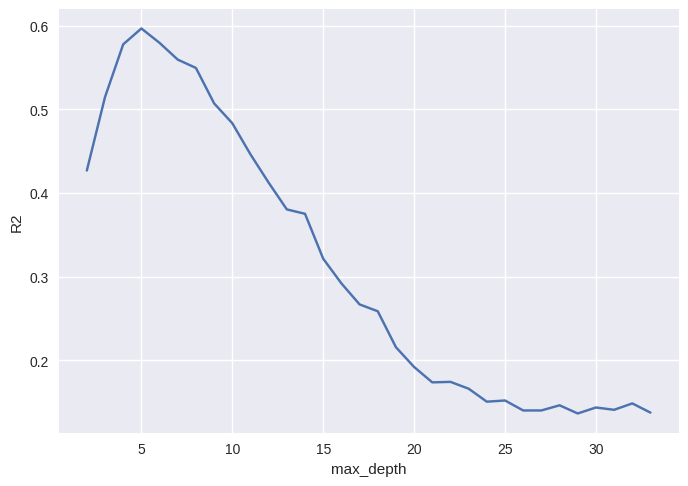

In [118]:
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2');

La gráfica muestra un óptimo cuando la profundidad del árbol es de 5

In [119]:
# Probar modelo con una profundidad 5
tree_5 = DecisionTreeRegressor(random_state = 42, max_depth=5)# Instanciar el modelo
tree_5.fit(X_train,y_train) # Entrenamiento el modelo

y_pred_train_5 = tree_5.predict(X_train)
y_pred_test_5 = tree_5.predict(X_test) #Predecir y

tree_r2_train_5 = r2_score(y_train, y_pred_train_5)
tree_r2_test_5 = r2_score(y_test, y_pred_test_5)

print("R2 en train", tree_r2_train_5)
print("R2 en test", tree_r2_test_5)

R2 en train 0.6049970113886772
R2 en test 0.5967583381181023


El modelo sube considerablemente su rendimiento con una profundidad de 5, en ésta profundidad practicamente no está sobreajustado.

In [120]:
# RMSE para árbol de profundidad 5
rmse_train_5 = np.sqrt(mean_squared_error(y_train,y_pred_train_5))
rmse_train_5

1074.4710590551472

In [121]:
rmse_test_5 = np.sqrt(mean_squared_error(y_test,y_pred_test_5))
rmse_test_5

1077.301593693722

Conclusiones :
- EL modelo de Regresión Lineal funciona mejor que el modelo de árbol de Regresión, sin ajuste de parámetros. Puesto que el segundo, se sobreajusta demasiado.
- El modelo de árbol ajustado a una profundidad de 5, según optimización de rango entre 2 a 34, mejora su rendimiento, disminuye el sobreajuste y disminuye su RMSE.

Por lo tanto, se aconseja uso de modelo ajustado de árbol de decisión, con un parámetro de profundidad 5.